In [1]:
import sys
import numpy as np
from functools import reduce
import sounddevice as sd

from pam import SoundCommunication

In [2]:
import reedsolo as rs

In [4]:
# sampling rate
FS = 44100

In [5]:
def pad(W, padding=0.5):
    return np.hstack((np.zeros(int(FS*padding)), W, np.zeros(int(FS*padding))))

In [6]:
def encode_rs(text):

    num_parity = 80
    assert len(text) < 255 - num_parity
    msg_bytes = text.encode('ascii')
    
    msg_bytes = b'\x00' * (255 - num_parity - len(msg_bytes)) + msg_bytes

    codec = rs.RSCodec(num_parity)
    return codec.encode(msg_bytes)

bytearray(b"\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00hello\xcaT\xb2\xd3\xa0\x9f1*5\\\t\xe4(\x15\'\xa0\'\x04\x8b\x93wL\xb65\xeb\x88\xe9x+B\xf5\xc3\x81K\x01`lT\xf6\xb6\xb1\x9a\xef>\xfdc\xba\xf5?5@\xef\xc8\xfb\xd5\xb3\xfb\xd1I$\x93|\xdchIM:y\xa6<]2\xdc\xea\xf9\x8e\xe2\x7f\xb8k")

In [11]:
with open('text.txt') as f:
    text = f.read()

In [12]:
def decode_rs(msg_bytes_rs):
    num_parity = 80

    codec = rs.RSCodec(num_parity)
    msg_bytes = codec.decode(msg_bytes_rs)
    while msg_bytes[0] == 0:
        msg_bytes = msg_bytes[1:]
    return msg_bytes

In [25]:
comm = SoundCommunication(FS, 200, 1000, 2000, msgSymLen=255*8)
from testing import Tester
t = Tester(comm)


('00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000101010001101000011001010010000001110011X11101000111010101100100011110010010000001101111011001100010X000010001010110111X01100111011011000110100101X100110110100000100000011011000110100101110100011001010111001001100001011101000111010101110010011001010010000001101001011011100010000001110100011010000110010100100000011001010110000101110010011011000111X001001000000111010001110111011001010110111001110100011110010010110101100110011010010111001001110011011101000010000001100011011001010110111001110100011101010111001001111001X0100000011010010111001100100000011010000110111101110X11011101000010000000001010011101000110111100100X000110000101101110001000000110010101111000011010000110100101101100011000010111001001100001011101000110100101101110011001110X10000001110010011000010110111001100111011001010010000001101111011001X00010000001100011011100X0011010010111010001101001011000110110000X011011

In [16]:
rw

bytearray(b'\x00\x00\x00P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02The study og Anglish literature in0the early\xa0tuenty-firs4 century is host \nto an exhilarating range of c2ipical approaches,"thEories and hist\xefsigal rerspectives./)\x8cH\xc3\xe9\x84\xcdav\x97Q]\xab\t\x0cw\xe9#\x8c\xb0g~\x1ex\x86\x82\xb5\xc7\x8d\xfe\x1ap\x8f\xf0\x85L?WO\x80\xff\x81\x97\x07V\xa6\x8bh\x94*\xde\xccH~7\x82\x1b \xa8;\xedD\xf0\xb9\x85\x89\x04\x8fr6\xd7\xd3\xf6\xd2\x99\xb9\xd0fb')

In [26]:
r = encode_rs(text)
S = comm.send(r)
W = t.addBandpassNoise(S, 4, 0)
rw = comm.decode(W)
t.diff(r,rw)

('00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000X0X0X000XX0X0000XX00X0X00X000000XXX00XX0XXX0X000XXX0X0X0XX00X000XXXX00X00X000000XX0XXXX0XX00XX000X000000X000X0X0XX0XXX00XX00XXX0XX0XX000XX0X00X0XXX00XX0XX0X00000X000000XX0XX000XX0X00X0XXX0X000XX00X0X0XXX00X00XX0000X0XXX0X000XXX0X0X0XXX00X00XX00X0X00X000000XX0X00X0XX0XXX000X000000XXX0X000XX0X0000XX00X0X00X000000XX00X0X0XX0000X0XXX00X00XX0XX000XXXX00X00X000000XXX0X000XXX0XXX0XX00X0X0XX0XXX00XXX0X000XXXX00X00X0XX0X0XX00XX00XX0X00X0XXX00X00XXX00XX0XXX0X0000X000000XX000XX0XX00X0X0XX0XXX00XXX0X000XXX0X0X0XXX00X00XXXX00X00X000000XX0X00X0XXX00XX00X000000XX0X0000XX0XXXX0XXX00XX0XXX0X0000X000000000X0X00XXX0X000XX0XXXX00X000000XX0000X0XX0XXX000X000000XX00X0X0XXXX0000XX0X0000XX0X00X0XX0XX000XX0000X0XXX00X00XX0000X0XXX0X000XX0X00X0XX0XXX00XX00XXX00X000000XXX00X00XX0000X0XX0XXX00XX00XXX0XX00X0X00X000000XX0XXXX0XX00XX000X000000XX000XX0XXX00X00XX0X00X0XXX0X000XX0X00X0XX000XX0XX0000X0XX0XX

In [24]:
res = decode_rs(rw)

In [58]:
import matplotlib.pyplot as plt


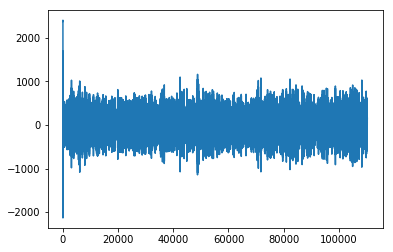

In [62]:
plt.plot(np.correlate(W[:3*comm.FS], comm.corr_signal()))
plt.show()